<a href="https://colab.research.google.com/github/pereira-71/PRACTICA-01-SIS421/blob/main/PRACTICA_01_SIS421_Web_Scraping_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRACTICA-01**


*Link de repositorio:* https://github.com/pereira-71/PRACTICA-01



### ***Web scraping para imagenes***


Este proyecto realiza web scraping para:

Conectarse a una página web.

Buscar imágenes dentro del HTML.

Descargar esas imágenes y guardarlas en una carpeta.

Mostrar visualmente las imágenes descargadas.

Instalación de librerías necesarias


In [28]:
!pip install requests beautifulsoup4 lxml Pillow


| Librería         |nos sirve para                                                             |
| ---------------- | ------------------------------------------------------------------------------ |
| `requests`       | Hacer peticiones HTTP (acceder a una página web, como si fueras un navegador). |
| `beautifulsoup4` | Leer el código HTML de la página y extraer elementos como `<img>`.             |
| `lxml`           | Es un “parser”, un motor que ayuda a BeautifulSoup a leer el HTML más rápido.  |
| `Pillow`         | Trabajar con imágenes (abrirlas, guardarlas, mostrarlas).                      |


A continuación: definimos la función descargar_imagenes().

In [29]:
import requests
from bs4 import BeautifulSoup
import os
from urllib.parse import urljoin, urlparse
import time
from PIL import Image
import io

def descargar_imagenes(url_pagina, carpeta_destino="imagenes_descargadas", max_imagenes=10):
    """
    Función para descargar imágenes de una página web
    """

    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        print(f"Accediendo a: {url_pagina}")
        response = requests.get(url_pagina, headers=headers, timeout=10)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')
        imagenes = soup.find_all('img')
        print(f"Se encontraron {len(imagenes)} etiquetas de imagen")

        contador = 0

        for i, img in enumerate(imagenes):
            if contador >= max_imagenes:
                break

            img_url = img.get('src') or img.get('data-src')

            if not img_url:
                continue

            img_url = urljoin(url_pagina, img_url)

            try:
                print(f"Descargando imagen {contador + 1}: {img_url}")
                img_response = requests.get(img_url, headers=headers, timeout=10)
                img_response.raise_for_status()

                parsed_url = urlparse(img_url)
                extension = os.path.splitext(parsed_url.path)[1]
                if not extension:
                    extension = '.jpg'

                nombre_archivo = f"imagen_{contador + 1}{extension}"
                ruta_archivo = os.path.join(carpeta_destino, nombre_archivo)

                with open(ruta_archivo, 'wb') as f:
                    f.write(img_response.content)

                print(f"✓ Imagen guardada: {nombre_archivo}")
                contador += 1
                time.sleep(1)

            except Exception as e:
                print(f"✗ Error descargando imagen {img_url}: {str(e)}")
                continue

        print(f"\n¡Proceso completado! Se descargaron {contador} imágenes en la carpeta '{carpeta_destino}'")
        archivos = os.listdir(carpeta_destino)
        print(f"Archivos descargados: {archivos}")

        return contador

    except Exception as e:
        print(f"Error accediendo a la página: {str(e)}")
        return 0


donde los parametros de la función son:

url_pagina: página que vas a scrapear.

carpeta_destino: carpeta donde se guardarán las imágenes.

max_imagenes: límite de cuántas imágenes descargar (para no saturar el servidor).

In [30]:
#  URL scrapearemos
url_pagina = "http://books.toscrape.com/"  # cualquiera

resultado = descargar_imagenes(
    url_pagina=url_pagina,
    carpeta_destino="mis_imagenes",
    max_imagenes=5
)


Accediendo a: http://books.toscrape.com/
Se encontraron 20 etiquetas de imagen
Descargando imagen 1: http://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg
✓ Imagen guardada: imagen_1.jpg
Descargando imagen 2: http://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg
✓ Imagen guardada: imagen_2.jpg
Descargando imagen 3: http://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg
✓ Imagen guardada: imagen_3.jpg
Descargando imagen 4: http://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg
✓ Imagen guardada: imagen_4.jpg
Descargando imagen 5: http://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg
✓ Imagen guardada: imagen_5.jpg

¡Proceso completado! Se descargaron 5 imágenes en la carpeta 'mis_imagenes'
Archivos descargados: ['imagen_3.jpg', 'imagen_5.jpg', 'imagen_4.jpg', 'imagen_2.jpg', 'imagen_1.jpg']


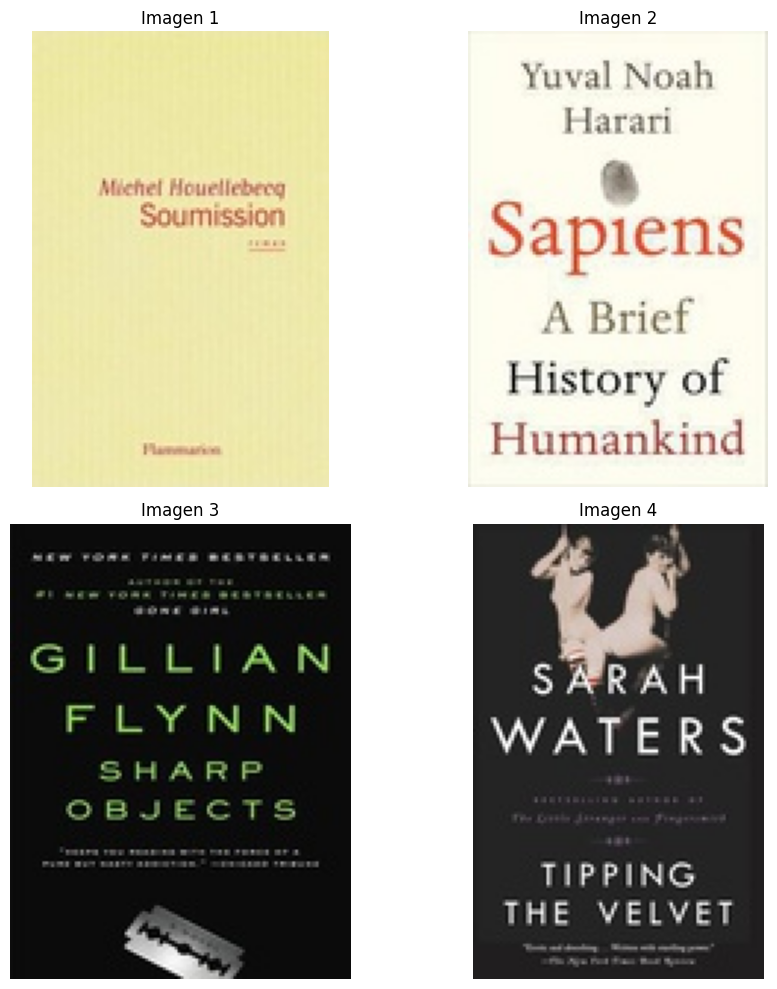

In [31]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

def mostrar_imagenes_descargadas(carpeta="mis_imagenes"):
    archivos_img = glob.glob(f"{carpeta}/*")[:4]

    if not archivos_img:
        print("No se encontraron imágenes para mostrar")
        return

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()

    for i, archivo in enumerate(archivos_img):
        try:
            img = Image.open(archivo)
            axes[i].imshow(img)
            axes[i].set_title(f"Imagen {i+1}")
            axes[i].axis('off')
        except Exception as e:
            axes[i].text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center')
            axes[i].axis('off')

    for i in range(len(archivos_img), 4):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar imágenes descargadas
mostrar_imagenes_descargadas()


Iteramos sobre las primeras 4 imágenes y las podemos visualizar
Listamos hasta 4 imágenes en /content/mis_imagenes.
Creamos una cuadrícula 2x2 y muestra cada imagen con un título.
Si hay menos de 4 imágenes, los espacios vacíos se desactivan.
Si una imagen no se puede abrir, muestra un mensaje de error.

# **Cómo escalar para grandes volúmenes**

Múltiples URLs: Se usa una lista de URLs.

Paginación: Se puede Scrapear múltiples páginas de un sitio (por ejemplo, Pixabay: https://pixabay.com/images/search/nature/?pagi=2).

Google Drive: Se puede almacenar imágenes en /content/drive/MyDrive/mis_imagenes.

Retraso ajustable: Se puede aumentar time.sleep(1) a time.sleep(2) o más para sitios estrictos.

Proxies: Si nos bloquean, se puede considerar usar proxies (requiere librerías adicionales como requests con proxies).

# **Conclusión**

Cómo funciona el código:

Descarga el HTML de una página, extrae etiquetas <img>, convierte URLs relativas a absolutas, descarga hasta max_imagenes imágenes, y las guarda en una carpeta.
Muestra las imágenes descargadas en una cuadrícula 2x2 usando matplotlib y Pillow.


Fortalezas: Simple, claro, ideal para pruebas en sitios como http://books.toscrape.com/.

Limitaciones: No maneja imágenes dinámicas ni descargas paralelas, pero se puede mejorar.

Uso en Colab:  cambiando la URL  para otros sitios (por ejemplo, https://pixabay.com/images/search/nature/).

Escalabilidad: Se puede usar listas de URLs, paginación, y Google Drive para manejar grandes volúmenes.
